In [ ]:
import os
import numpy as np
import gc
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Plot(x, size, p, type = False):
    plt.figure(figsize=(10,size//5*2))
    for i in range(size):  # Display and save the first 5 separated images for rings and dots
      plt.subplot(size//5, 5, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      if type:
        plt.imshow(x[i], cmap=plt.cm.binary)
      else:
        # plt.imshow(x[i], cmap='gray', vmin=0, vmax=1)
        plt.imshow(x[i], cmap=plt.cm.binary, vmin=0, vmax=0.01)
      #plt.imshow(x[i].reshape((height, width)), cmap='gray', vmin=0, vmax=255)
      plt.axis('off')
      # plt.colorbar()
    plt.show()

In [ ]:
def load_and_preprocess_images(directory_path, size=(200, 200)):
    images = []
    try:
        for filename in os.listdir(directory_path):
            if filename.endswith(".png"):
                file_path = os.path.join(directory_path, filename)
                img = Image.open(file_path).convert('L')  # Convert to grayscale
                img_resized = img.resize(size, Image.Resampling.LANCZOS)
                img_array = np.array(img_resized)
                images.append(img_array)

        if len(images) == 0:
            raise ValueError(f"No images found in directory: {directory_path}")

        # images = np.array(images) / 255.0  # Normalize the images
        images = np.array(images, dtype=np.float16) / 255.0
        return images

    except Exception as e:
        print(f"Error loading and preprocessing images: {e}")
        return None

def create_labels(images, label):
    labels = [label] * len(images)
    return np.array(labels)

def split_dataset(images, labels, test_size=0.3):
    try:
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=42)
        return train_images, test_images, train_labels, test_labels
    except ValueError as ve:
        print(f"Error splitting dataset: {ve}")
        return None, None, None, None

In [ ]:
width, height = 500, 500

# Load and preprocess images
input_directory_dots = "/content/drive/MyDrive/stuff3"
output_directory_dots = "/content/drive/MyDrive/output3"
images_dots = load_and_preprocess_images(output_directory_dots, size=(width, height))

input_directory_rings = "/content/drive/MyDrive/stuff6"
output_directory_rings = "/content/drive/MyDrive/output6"
images_rings = load_and_preprocess_images(output_directory_rings, size=(width, height))

# Blank images (no longer needed, uploaded for testing purposes only)
# input_directory_blank = "/content/drive/MyDrive/metal2"
# output_directory_blank = "/content/drive/MyDrive/output"
# images_blank = load_and_preprocess_images(output_directory_blank, size=(width, height))

Analyze the loaded dot and ring images...
images_dots.shape: (721, 500, 500)
images_rings.shape: (720, 500, 500)
images_dots - max: 0.7919921875 min: 0.0 non-zeros: 456843
images_dots[0] - max: 0.12939453125 min: 0.0 non-zeros: 178
images_rings - max: 0.7646484375 min: 0.0 non-zeros: 59614058
images_rings[0] - max: 0.458740234375 min: 0.0 non-zeros: 123337

Run min-max normalization on the images...
images_dots_reduced - max: 1.0 min: 0.0 non-zeros: 456347
images_dots_reduced[0] - max: 0.16337854500616522 min: 0.0 non-zeros: 178
images_rings_reduced - max: 1.0 min: 0.0 non-zeros: 59614058
images_rings_reduced[0] - max: 0.60009765625 min: 0.0 non-zeros: 123337

Strengthen the dots and ring intensities...
images_dots_scaled - max: 1.0 min: 0.0 non-zeros: 456347
images_dots_scaled[0] - max: 1.0 min: 0.0 non-zeros: 178
images_rings_scaled - max: 1.0 min: 0.0 non-zeros: 59614058
images_rings_scaled[0] - max: 1.0 min: 0.0 non-zeros: 123337

Combine to create dots and ring images...

Plotting

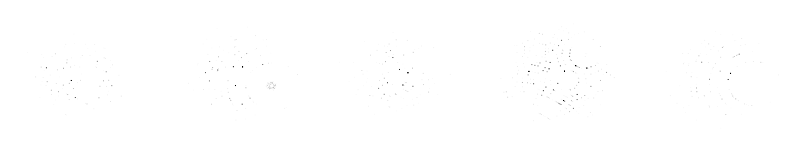

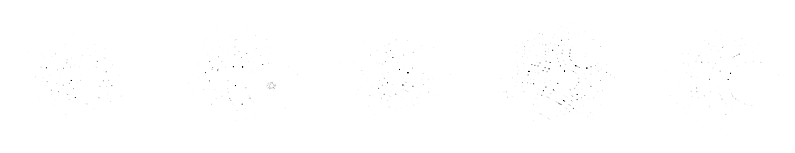

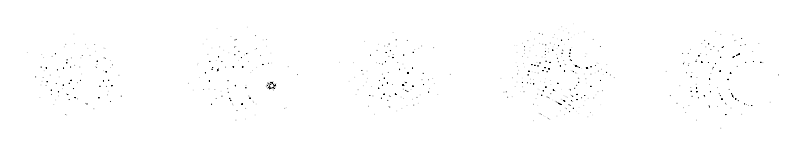

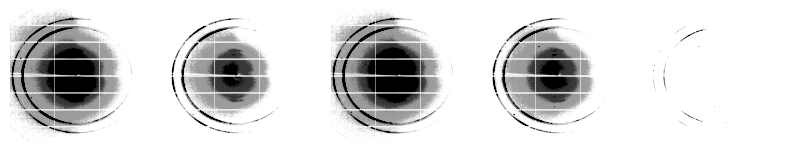

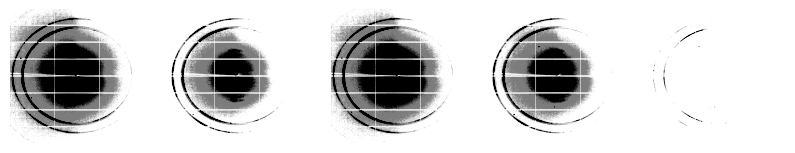

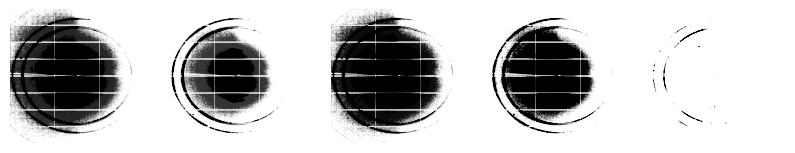

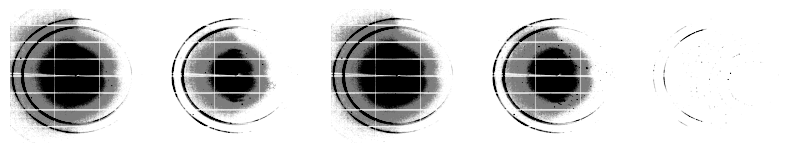

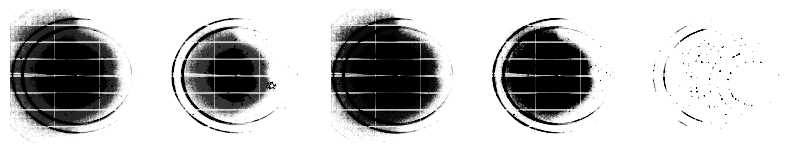

In [ ]:
print(f"Analyze the loaded dot and ring images...")
print(f"images_dots.shape: {images_dots.shape}")
print(f"images_rings.shape: {images_rings.shape}")

# Find out the pixel values of each image types
print(f"images_dots - max: {np.max(images_dots)} min: {np.min(images_dots)} non-zeros: {np.count_nonzero(images_dots)}")
print(f"images_dots[0] - max: {np.max(images_dots[0])} min: {np.min(images_dots[0])} non-zeros: {np.count_nonzero(images_dots[0])}")
print(f"images_rings - max: {np.max(images_rings)} min: {np.min(images_rings)} non-zeros: {np.count_nonzero(images_rings)}")
print(f"images_rings[0] - max: {np.max(images_rings[0])} min: {np.min(images_rings[0])} non-zeros: {np.count_nonzero(images_rings[0])}")

new_size = images_rings.shape[0]
images_dots_reduced = np.zeros((new_size, width, height))
for i in range(new_size):
    images_dots_reduced[i] = images_dots[i]

# Fix the images - how does it work exactly, build the formula and get the actual values.
print(f"\nRun min-max normalization on the images...")
images_dots_reduced = (images_dots_reduced - np.min(images_dots_reduced)) / (np.max(images_dots_reduced) - np.min(images_dots_reduced))
images_rings_reduced = (images_rings - np.min(images_rings)) / (np.max(images_rings) - np.min(images_rings))

print(f"images_dots_reduced - max: {np.max(images_dots_reduced)} min: {np.min(images_dots_reduced)} non-zeros: {np.count_nonzero(images_dots_reduced)}")
print(f"images_dots_reduced[0] - max: {np.max(images_dots_reduced[0])} min: {np.min(images_dots_reduced[0])} non-zeros: {np.count_nonzero(images_dots_reduced[0])}")
print(f"images_rings_reduced - max: {np.max(images_rings_reduced)} min: {np.min(images_rings_reduced)} non-zeros: {np.count_nonzero(images_rings_reduced)}")
print(f"images_rings_reduced[0] - max: {np.max(images_rings_reduced[0])} min: {np.min(images_rings_reduced[0])} non-zeros: {np.count_nonzero(images_rings_reduced[0])}")

# HACK! Ask Yang for suggestions
print(f"\nStrengthen the dots and ring intensities...")
# Approach 1: apply a local scaling but lead to a loss of relative intensity information between images.
images_dots_scaled = np.array([img / np.max(img) if np.max(img) != 0 else img for img in images_dots_reduced])
images_rings_scaled = np.array([img / np.max(img) if np.max(img) != 0 else img for img in images_rings_reduced])

# Approach 2: apply a non-linear scaling to enhance the contrast in images (NOT WORKING WELL, CHECK!!)
# images_dots_adaptive = np.log1p(images_dots_reduced)  # Logarithmic scaling
# images_dots_adaptive = images_dots_adaptive / np.max(images_dots_adaptive)
# images_rings_adaptive = np.log1p(images_rings_reduced)  # Logarithmic scaling
# images_rings_adaptive = images_rings_adaptive / np.max(images_rings_adaptive)

print(f"images_dots_scaled - max: {np.max(images_dots_scaled)} min: {np.min(images_dots_scaled)} non-zeros: {np.count_nonzero(images_dots_scaled)}")
print(f"images_dots_scaled[0] - max: {np.max(images_dots_scaled[0])} min: {np.min(images_dots_scaled[0])} non-zeros: {np.count_nonzero(images_dots_scaled[0])}")
# print(f"images_dots_adaptive - max: {np.max(images_dots_adaptive)} min: {np.min(images_dots_adaptive)} non-zeros: {np.count_nonzero(images_dots_adaptive)}")
# print(f"images_dots_adaptive[0] - max: {np.max(images_dots_adaptive[0])} min: {np.min(images_dots_adaptive[0])} non-zeros: {np.count_nonzero(images_dots_adaptive[0])}")
print(f"images_rings_scaled - max: {np.max(images_rings_scaled)} min: {np.min(images_rings_scaled)} non-zeros: {np.count_nonzero(images_rings_scaled)}")
print(f"images_rings_scaled[0] - max: {np.max(images_rings_scaled[0])} min: {np.min(images_rings_scaled[0])} non-zeros: {np.count_nonzero(images_rings_scaled[0])}")
# print(f"images_rings_adaptive - max: {np.max(images_rings_adaptive)} min: {np.min(images_rings_adaptive)} non-zeros: {np.count_nonzero(images_rings_adaptive)}")
# print(f"images_rings_adaptive[0] - max: {np.max(images_rings_adaptive[0])} min: {np.min(images_rings_adaptive[0])} non-zeros: {np.count_nonzero(images_rings_adaptive[0])}")

# Combined ring and dot images to create an overlapping image
print(f"\nCombine to create dots and ring images...")
images_combined_reduced = images_rings_reduced + images_dots_reduced
images_combined_scaled = images_rings_scaled + images_dots_scaled
# print(f"images_combined - max: {np.max(images_combined)} min: {np.min(images_combined)} non-zeros: {np.count_nonzero(images_combined)}")
# print(f"images_combined[0] - max: {np.max(images_combined[0])} min: {np.min(images_combined[0])} non-zeros: {np.count_nonzero(images_combined[0])}")

print(f"\nPlotting processed images...")
Plot(images_dots, 5, None)
Plot(images_dots_reduced, 5, None)
Plot(images_dots_scaled, 5, None)
Plot(images_rings, 5, None)
Plot(images_rings_reduced, 5, None)
Plot(images_rings_scaled, 5, None)
Plot(images_combined_reduced, 5, None)
Plot(images_combined_scaled, 5, None)

In [ ]:
del images_dots, images_rings, images_dots_reduced, images_rings_reduced # , images_dots_scaled, images_rings_scaled

# Manually invoke garbage collector
gc.collect()

44633

In [ ]:
# Split the dataset for training and testing (70% and 30%)
train_images_combined, test_images_combined, train_images_rings, test_images_rings = split_dataset(images_combined, images_rings_scaled)

print("train_images_combined: ", train_images_combined.shape)
print(f"train_images_combined - max: {np.max(train_images_combined)} min: {np.min(train_images_combined)} non-zeros: {np.count_nonzero(train_images_combined)}")
print(f"train_images_combined[0] - max: {np.max(train_images_combined[0])} min: {np.min(train_images_combined[0])} non-zeros: {np.count_nonzero(train_images_combined[0])}")
print("train_images_rings: ", train_images_rings.shape)
print(f"train_images_rings - max: {np.max(train_images_rings)} min: {np.min(train_images_rings)} non-zeros: {np.count_nonzero(train_images_rings)}")
print(f"train_images_rings[0] - max: {np.max(train_images_rings[0])} min: {np.min(train_images_rings[0])} non-zeros: {np.count_nonzero(train_images_rings[0])}")
print("test_images_combined: ", test_images_combined.shape)
print(f"test_images_combined - max: {np.max(test_images_combined)} min: {np.min(test_images_combined)} non-zeros: {np.count_nonzero(test_images_combined)}")
print(f"test_images_combined[0] - max: {np.max(test_images_combined[0])} min: {np.min(test_images_combined[0])} non-zeros: {np.count_nonzero(test_images_combined[0])}")
print("test_images_rings: ", test_images_rings.shape)
print(f"test_images_rings - max: {np.max(test_images_rings)} min: {np.min(test_images_rings)} non-zeros: {np.count_nonzero(test_images_rings)}")
print(f"test_images_rings[0] - max: {np.max(test_images_rings[0])} min: {np.min(test_images_rings[0])} non-zeros: {np.count_nonzero(test_images_rings[0])}")

train_images_combined:  (504, 500, 500)
train_images_combined - max: 1.09088134765625 min: 0.0 non-zeros: 41273484
train_images_combined[0] - max: 1.0083236694335938 min: 0.0 non-zeros: 43549
train_images_rings:  (504, 500, 500)
train_images_rings - max: 1.0 min: 0.0 non-zeros: 41035843
train_images_rings[0] - max: 1.0 min: 0.0 non-zeros: 43423
test_images_combined:  (216, 500, 500)
test_images_combined - max: 1.109375 min: 0.0 non-zeros: 18598895
test_images_combined[0] - max: 1.0 min: 0.0 non-zeros: 1588
test_images_rings:  (216, 500, 500)
test_images_rings - max: 1.0 min: 0.0 non-zeros: 18578215
test_images_rings[0] - max: 1.0 min: 0.0 non-zeros: 1264


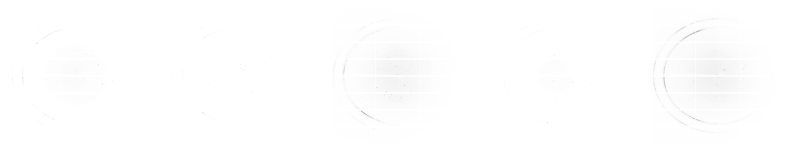

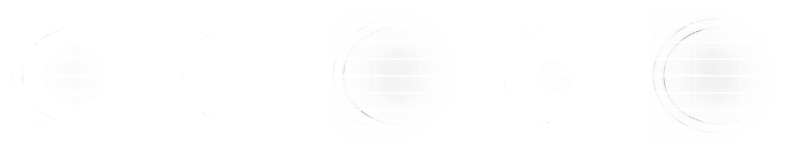

In [ ]:
# Display and save the first 5 combined images
Plot(train_images_combined, 5, None, True)
Plot(train_images_rings, 5, None, True)
# Plot(train_images_dots, 5, None, True)

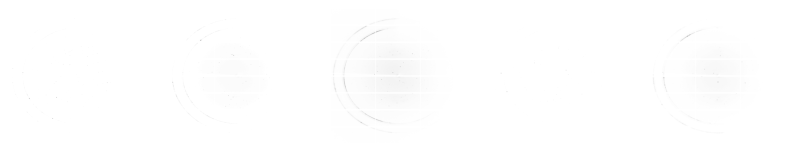

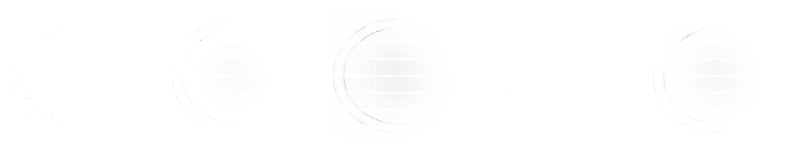

In [ ]:
# Display and save the first 5 combined images for test
Plot(test_images_combined, 5, None, True)
Plot(test_images_rings, 5, None, True)
# Plot(test_images_dots, 5, None, True)

In [ ]:
# Convolutional Autoencoder architecture
input_img = Input(shape=(height, width, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training the autoencoder (for real images)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(train_images_combined.reshape((-1, height, width, 1)),    # input data with noise (rings+dots)
                train_images_rings.reshape((-1, height, width, 1)), # ouput data without noise (rings)
                epochs=50, # 50 complete pass through the entire training dataset
                batch_size=10, # 32 number of samples that will be propagated through the network in one forward/backward pass
                validation_data = (test_images_combined.reshape((-1, height, width, 1)),
                                   test_images_rings.reshape((-1, height, width, 1))), # evaluate the model's performance at the end of each epoch
                callbacks=[early_stopping])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 0.5356 - val_loss: 0.0575
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0467 - val_loss: 0.0375
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0341 - val_loss: 0.0336
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0301 - val_loss: 0.0314
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0283 - val_loss: 0.0307
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0280 - val_loss: 0.0296
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0273 - val_loss: 0.0288
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0268 - val_loss: 0.0284
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0284 - val_loss: 0.0282
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0264 - val_loss: 0.0281
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0255 - val_loss: 0.0280
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0

In [ ]:
# Use the trained autoencoder to decode the combined images
evaluation = autoencoder.evaluate(test_images_combined.reshape((-1, height, width, 1)), test_images_rings.reshape((-1, height, width, 1)))
print('Test Accuracy : {:.3f}'.format(evaluation))

# Reconstruct the image without dots and only rings
predicted = autoencoder.predict(test_images_combined.reshape((-1, height, width, 1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 541ms/step - loss: 0.0270
Test Accuracy : 0.028
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


test_images_combined:  (216, 500, 500)
test_images_rings:  (216, 500, 500)
predicted:  (216, 500, 500, 1)
predicted_squeezed:  (216, 500, 500)
test_images_combined - max: 1.0 min: 0.0 non-zeros: 1588
predicted_squeezed - max: 0.18297035992145538 min: 3.458736941297502e-08 non-zeros: 250000
images_decoded - max: 1.0 min: 0.0 non-zeros: 249990
images_decoded_alt - max: 1.0 min: 0.025223232805728912 non-zeros: 250000


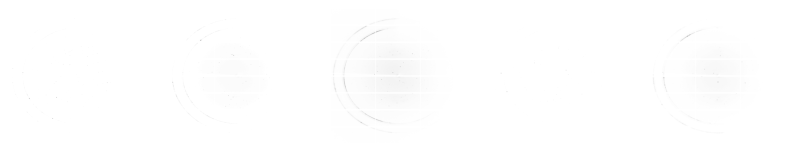

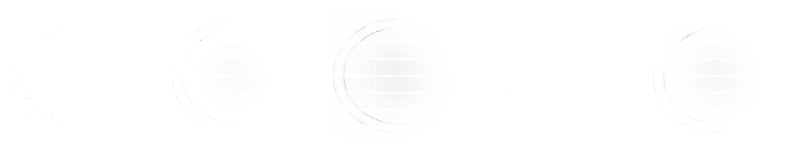

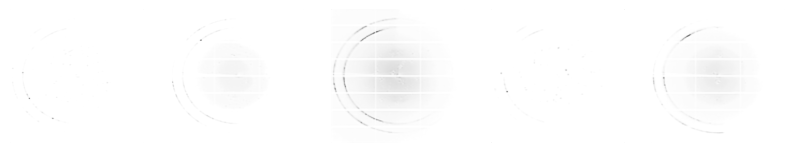

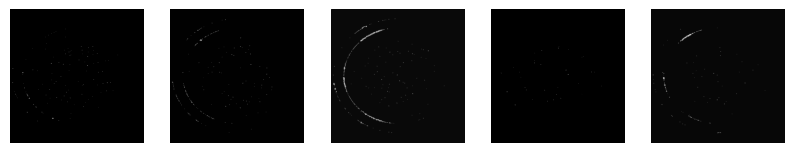

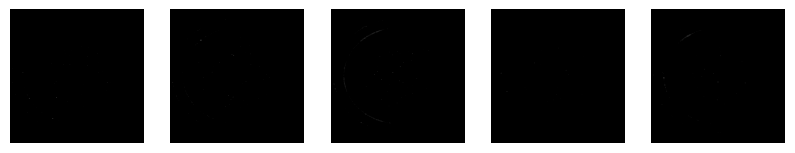

In [ ]:
# Separate the ring and dot images from the test_images_combined
print("test_images_combined: ", test_images_combined.shape)
print("test_images_rings: ", test_images_rings.shape)
print("predicted: ", predicted.shape)
predicted_squeezed = np.squeeze(predicted)
print("predicted_squeezed: ", predicted_squeezed.shape)

# Separate the ring and dot images from the real test_images_combined image

# Approach 1: When dissimilar_mask is TRUE dots pixel color is chosen, else white color is chosen
similar_pixels = np.isclose(test_images_combined, predicted_squeezed, atol=0.05)  # tolerance level 10% difference
dissimilar_mask = np.logical_not(similar_pixels)
images_decoded = np.where(dissimilar_mask, test_images_combined, 1)

# Approach 2: 1 - (ground truth - predicted)
difference = np.abs(test_images_combined - predicted_squeezed)
toleranced_difference = np.where(difference < 0.05, 0, difference) # tolerance level 10% difference
images_decoded_alt = 1 - toleranced_difference

print(f"test_images_combined - max: {np.max(test_images_combined[0])} min: {np.min(test_images_combined[0])} non-zeros: {np.count_nonzero(test_images_combined[0])}")
print(f"predicted_squeezed - max: {np.max(predicted_squeezed[0])} min: {np.min(predicted_squeezed[0])} non-zeros: {np.count_nonzero(predicted_squeezed[0])}")
print(f"images_decoded - max: {np.max(images_decoded[0])} min: {np.min(images_decoded[0])} non-zeros: {np.count_nonzero(images_decoded[0])}")
print(f"images_decoded_alt - max: {np.max(images_decoded_alt[0])} min: {np.min(images_decoded_alt[0])} non-zeros: {np.count_nonzero(images_decoded_alt[0])}")

# number_of_similar_pixels = np.count_nonzero(similar_pixels)
# similar_indices = np.where(similar_pixels)
# number_of_dissimilar_pixels = np.count_nonzero(dissimilar_mask)
# dissimilar_indices = np.where(dissimilar_mask)
# dissimilar_values_test = test_images_combined[dissimilar_indices]
# dissimilar_values_predicted = predicted_squeezed[dissimilar_indices]
# print("Similarities between ground truth and autoencoder output")
# print("Number of similar pixels:", number_of_similar_pixels)
# print("Number of dissimilar pixels:", number_of_dissimilar_pixels)
# not_close_to_one = np.logical_not(np.isclose(test_images_combined[0], 1, atol=0.05))
# print(f"test_images_combined - non-ones: {np.count_nonzero(not_close_to_one)}")
# not_close_to_one = np.logical_not(np.isclose(predicted_squeezed[0], 1, atol=0.05))
# print(f"predicted_squeezed - non-ones: {np.count_nonzero(not_close_to_one)}")
# not_close_to_one = np.logical_not(np.isclose(images_decoded[0], 1, atol=0.05))
# print(f"images_decoded - non-ones: {np.count_nonzero(not_close_to_one)}")
# not_close_to_one = np.logical_not(np.isclose(images_decoded_alt[0], 1, atol=0.05))
# print(f"images_decoded_alt - non-ones: {np.count_nonzero(not_close_to_one)}")

Plot(test_images_combined, 5, None, True)
Plot(test_images_rings, 5, None, True)
Plot(predicted_squeezed, 5, None, True)
Plot(images_decoded, 5, None, True)
Plot(images_decoded_alt, 5, None, True)